<Body>   
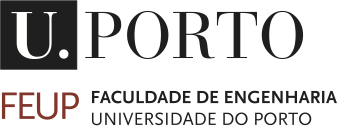   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Notebook #02: Fundamentals**

# **3D and contour plots in Python**

Matplotlib is a Python library for creating visualizations. Online doucmentation is available at https://matplotlib.org.

### **Example:**
Let us produce some plots of the function $f:{\mathbb{R}}^2\rightarrow\mathbb{R}$ defined by $f(x)=x_1^2+2x_2^2+x_1x_2$, where $x=(x_1, x_2)^\top$.


First, we plot the 3D surface defined by the function: points $\left(x_1,x_2,f(x)\right)$ in $\mathbb{R}^3$.

In [ ]:
#@title Plot 3D surface - example
import numpy as np
import matplotlib.pyplot as plt

# sample x_1 and x_2 variables
MIN = -3
MAX = 3
STEP = 0.2
x1 = np.arange(MIN,MAX+STEP,STEP)
x2 = np.arange(MIN,MAX+STEP,STEP)

# generate x_1 and x_2 coordinates of a rectangular 2D grid
# these matrices will be used to compute function values
X1, X2 = np.meshgrid(x1, x2)

# generate an array with the values of the function
F = X1**2 + 2*X2**2 + X1*X2

# now plot the 3D surface
plot_size = 8
fig, ax = plt.subplots(figsize=(plot_size,plot_size))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, F, rstride=2, cstride=2, cmap='viridis', edgecolor='none')
ax.set_title('surface');

plt.show()


Now compute the gradient of $f$, $\nabla f:\mathbb{R}^2\rightarrow\mathbb{R}^2$, 

$$\nabla f = \left(\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2}\right)^\top = \left(2x_1+x_2,x_1+4x_2\right)^\top$$

and plot at each point an arrow proportional to the gradient.

In [ ]:
#@title Plot gradient field - example

# compute gradient
dFdX1 = 2*X1+X2
dFdX2 = X1+4*X2

scale_factor = 0.1
plot_size = 8

fig, ax = plt.subplots(figsize=(plot_size,plot_size))
ax.quiver(X1,X2,scale_factor*dFdX1,scale_factor*dFdX2)

ax.set_aspect('equal')
ax.set_title('gradient')

plt.show()

Let's now include some level curves...

As you can see the gradient vectors are perpendicular to the line tangent to the corresponding level curves!

In [ ]:
#@title Plot level curves - example

plot_size = 7
fig, ax = plt.subplots(figsize=(plot_size,plot_size))

ax.quiver(X1,X2,scale_factor*dFdX1,scale_factor*dFdX2)

cs = ax.contour(X1,X2,F,10)

ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot and the gradient')
plt.grid()
plt.show()

### **Activity 1**
Plot the surface of the Probability Density Function (PDF) of the 2D Gaussian distribution with mean $\mu=\left(2,1\right)^\top$ and covariance
$\Sigma = \left[\begin{array}{cc} 1 & -1 \\ -1 & 1.5\end{array}\right]$.

Also obtain a contour plot of this PDF.

*Note*: The PDF of a $d$ dimensional  multivariate Gaussian distribution is given by
$$
p(x| \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left ({-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)} \right) 
$$

In [ ]:
#@title Plot 2D Gaussian PDF surface and contour lines
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def gaussian2D(X1,X2,mu,Sigma) :
    ''' return 2D array with values of PDF '''
    # Compute determinant and inverse of covariance matrix
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    
    #F = ... (to complete..., we have to expand the vectorial form)
  
    c = np.sqrt((2*np.pi)**2 * Sigma_det)

    return np.exp(-F/2) / c


# Our 2-dimensional distribution will be over variables X1 and X2
N = 100
x1 = np.linspace(-3, 5, N)
x2 = np.linspace(-2, 4, N)
X1, X2 = np.meshgrid(x1, x2)


# Mean vector and covariance matrix
mu = np.array([2, 1])
Sigma = np.array([[ 1 , -1], [-1,  1.5]])


# compute PDF
Z=gaussian2D(X1,X2,mu,Sigma)


# plot using subplots
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, rstride=3, cstride=3, cmap=cm.viridis)
ax.view_init(60,-80)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(X1, X2, Z, 10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.grid()
plt.show()

### **Activity 2**
Plot the surface and the contour lines of 

$$f(x) = \max \{p(x|\mu_1,\Sigma_1), p(x|\mu_2,\Sigma_2)\}$$

where $p(x|\mu,\Sigma)$ is the Probability Density Function (PDF) of the 2D Gaussian distribution with mean $\mu$ and covariance
$\Sigma$, and

$\mu_1 =\left(2,1\right)^\top$

$\Sigma_1 = \left[\begin{array}{cc} 1 & -1 \\ -1 & 1.5\end{array}\right]$

$\mu_1 =\left(-1,0\right)^\top$

$\Sigma_1 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1\end{array}\right]$


In [ ]:
#@title Activity 2 code

# Our 2-dimensional distribution will be over variables X1 and X2
N = 100
x1 = np.linspace(-4, 5, N)
x2 = np.linspace(-3, 4, N)
X1, X2 = np.meshgrid(x1, x2)

# To complete...
# Mean vector and covariance matrix PDF1 
# mu1 = ...
# Sigma1 = ...

# compute PDF1
# Z1 = ...

# Mean vector and covariance matrix PDF2
# mu2 = ...
# Sigma2 = ...

# compute PDF2
# Z2 = ...

# compute F
# F = ...

# plot using subplots
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, F, rstride=3, cstride=3, cmap=cm.viridis)
ax.view_init(60,-80)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(X1, X2, F, 10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.grid()
plt.show()

# **Optimization**

### **Activity 3**

For each of the following functions $f:\mathbb{R}^2\rightarrow\mathbb{R}$, the origin $x=(0,0)^\top$ is a critical point, that is, the gradient at that point is zero? 
Check whether it is a minimum point, a maximum point or a saddle point.
1. $f(x)=x_1^2+2x_2^2-x_1 x_2$
2. $f(x)=x_1^2+x_2^2-2x_1 x_2$
3. $f(x)=x_1^3-x_2^3$
4. $f(x)=-x_1^2+x_1 x_2-x_2^2$



## **Optimization methods**

Consider the optimization problem 
$$
\min_{\theta\in\mathbb{R}^d} J(\theta)
$$

A numerical (approximate) solution of such problem can be obtained using a **grid search**: discretizing the domain (in each dimension) and find the minimum value of $J$ on that grid. Finer grids lead to more accurate results, but the search takes longer!

As the gradient of a function points towards the direction of maximum increase of the function, a simple iterative method can be implemented to seek the minimum. At a given point, $\theta_k$, compute the gradient $\nabla J(\theta_{k})$ and move to new point $\theta_{k+1}$ in the direction of $-\nabla J(\theta_k)$, that is, make 
$$
\theta_{k+1}=\theta_k - \gamma \nabla J(\theta_k),
$$
where $\gamma$ known as the step size or learning rate is a positive parameter. Note that for $\gamma$ small enough $J(\theta_{k+1}) < J(\theta_k)$. This is the **gradient descent** method. Convergence of the method depends on the function $J$ and also on the step $\gamma$, that can be different at each iteration. 


### **Activity 4**

Consider the function $J:\mathbb{R}^2\rightarrow\mathbb{R}$, defined by 
$$
J(\theta) = \theta_1^2+\theta_2^2 + 3(\theta_1-1)^2+(\theta_2-1)^2 + \theta_1\theta_2
$$

#### **4.1** Grid search

Implement a grid search method to estimate the minimum of the function. Consider different grid spacings and compare resutls.

In [ ]:
#@title 4.1 code

import numpy as np

def J_func(theta1,theta2) :
#  return (to complete) 

theta1_min = 0
theta2_min = 0
J_min = float('inf')

XMIN = -3
XMAX = 3
DX = 0.01
YMIN = -3
YMAX = 3
DY = DX

for theta1 in np.arange(XMIN,XMAX+DX,DX) :
  for theta2 in np.arange(YMIN,YMAX+DY,DY) :
    J = J_func(theta1,theta2)
    # to complete...

print(f'min: {J_min} at ({theta1_min},{theta2_min})')


#### **4.2** Gradient descent

Implement a gradient descent method to estimate the minimum of the function. Stop the method after a given number of iterations. Show the results along the iterations and produce a contour plot of $J$ with the points along the iterations. Consider different step sizes and compare results.

Also determine the gradient of $J$ and obtain the minimum by solving $\nabla J=0$.

In [ ]:
#@title 4.2 code

import numpy as np
import matplotlib.pyplot as plt

# cost function
def J_func(theta1,theta2) :
#  return (to complete) 

# gradient
def J_grad(theta1,theta2) :
#  return (to complete) 

# step size
gamma = 0.1

# number of iterations
MAX_ITER = 10

# collect points along iterations
points = np.zeros((MAX_ITER+1,2))

# initial point
theta1_0,theta2_0 = 0,0

###########################
# gradient descent method

points[0] = [theta1_0,theta2_0]

for i in range(MAX_ITER) :
  print(i,points[i],J_func(points[i][0],points[i][1]))
  #points[i+1][0] = ... (to complete)
  #points[i+1][1] = ... (to complete)
 
print(i+1,points[i+1],J_func(points[i+1][0],points[i+1][1]))

# draw contour lines 
MIN = -0.5
MAX = 1.5
STEP = 0.1
theta1 = np.arange(MIN,MAX+STEP,STEP)
theta2 = np.arange(MIN,MAX+STEP,STEP)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J = Theta1**2 + Theta2**2 +3*(Theta1-1)**2 + (Theta2-1)**2

fig, ax = plt.subplots(figsize=(7,7))

cs = ax.contour(Theta1,Theta2,J,10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
plt.grid()

# draw sequence of solutions
plt.plot(points[:,0],points[:,1],'-*')

plt.show()

#### **4.3** Grid search ++

Modify the code in 2.1 to make an iterative refinement of the grid search. Start with a coarse grid in a given area and at each iteration reduce the search area and consider a finer grid. Stop when the spacing between grid points is less than a given value.

#### **4.4** Gradient descent ++

Modify the code in 2.4 to have an adaptive step. In each iteration,if the step is too large (resulting in a function increase) reduce it by a given factor (less than $1$) until the reduction in the value on function is obtained. Otherwise increase it by another factor while the function value still decreases.

### **Activity 5**

Repeat activity 4 with the function $J:\mathbb{R}^2\rightarrow\mathbb{R}$, defined by
$$J(x,y) = \frac{2(x^2+y^2)}{1+x^2+y^2} + 
\frac{(x-2)^2+(y-1)^2}{1+(x-2)^2+(y-1)^2}$$

Note that this function has two minima (a local one and a global one). Check that depending on the starting point, the gradient descent method converges either to the local or the global minimum.